<a href="https://colab.research.google.com/github/MahdiFaourr/MahdiFaourr/blob/main/tumor_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

In [14]:
from google.colab import files
uploaded=files.upload()
import zipfile
import io
with zipfile.ZipFile(io.BytesIO(uploaded['archive (4).zip']),'r')as zip_ref:
  zip_ref.extractall('brain_mri_scan_images')
import os
import shutil
from sklearn.model_selection import train_test_split
classes=['negative','positive']
root_directory="brain_mri_scan_images/brain_mri_scan_images"
for class_name in classes:
  os.makedirs(os.path.join(root_directory,'train',class_name),exist_ok=True)
  os.makedirs(os.path.join(root_directory,'test',class_name),exist_ok=True)
  class_directory=os.path.join(root_directory,class_name)
  files=os.listdir(class_directory)
  train_files,test_files=train_test_split(files,test_size=0.1,random_state=15)
  for file_name in train_files:
    src=os.path.join(class_directory,file_name)
    dst=os.path.join(root_directory,'train',class_name,file_name)
    shutil.move(src,dst)
  for file_name in test_files:
        src = os.path.join(class_directory, file_name)
        dst = os.path.join(root_directory, 'test', class_name, file_name)
        shutil.move(src, dst)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
train_iterator=datagen.flow_from_directory("brain_mri_scan_images/brain_mri_scan_images/train/",class_mode='binary',batch_size=300)
test_iterator=datagen.flow_from_directory("brain_mri_scan_images/brain_mri_scan_images/test/",class_mode='binary',batch_size=90)

x_train,y_train=train_iterator.next()
x_test,y_test=test_iterator.next()
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,AveragePooling2D,Dense
from tensorflow.keras.models import Sequential
def baseline_model(nb_neurons=30,nb_filters=3):
  model=Sequential()
  model.add(Conv2D(nb_filters,(3,3),padding='same'))
  model.add(AveragePooling2D())
  model.add(Conv2D(nb_filters,(3,3)))
  model.add(MaxPooling2D())
  model.add(Flatten())
  model.add(Dense(nb_neurons,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimozer='adam',loss='binary_crossentropy',metrics=['accuracy'])
  return model
model=baseline_model(nb_neurons=30,nb_filters=3)
model.fit(x_train,y_train,validation_split=0.1,epochs=5,batch_size=22)



Saving archive (4).zip to archive (4).zip
Found 204 images belonging to 2 classes.
Found 46 images belonging to 2 classes.


In [36]:

x_train,y_train=train_iterator.next()
x_test,y_test=test_iterator.next()


In [26]:
!pip install scikeras

In [44]:
from tensorflow.keras.layers import Conv2D, Flatten, AveragePooling2D, Dense
from tensorflow.keras.models import Sequential

def baseline_model(nb_neurons=25, nb_filters=3):
    model = Sequential()
    model.add(Conv2D(nb_filters, (3, 3), padding='same', input_shape=(256, 256, 3)))
    model.add(AveragePooling2D())
    model.add(Conv2D(2, (2, 2)))
    model.add(Flatten())
    model.add(Dense(nb_neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [39]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=baseline_model)
parameters = {'epochs': [7,12,20], 'batch_size': [12, 19, 25]}
grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=4)
result = grid_search.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/7
13/13 [==============================] - 6s 366ms/step - loss: 1.2343 - accuracy: 0.4902
Epoch 2/7
13/13 [==============================] - 5s 353ms/step - loss: 0.5771 - accuracy: 0.6863
Epoch 3/7
13/13 [==============================] - 3s 250ms/step - loss: 0.4615 - accuracy: 0.7516
Epoch 4/7
13/13 [==============================] - 5s 366ms/step - loss: 0.3234 - accuracy: 0.8889
Epoch 5/7
13/13 [==============================] - 3s 253ms/step - loss: 0.1688 - accuracy: 0.9804
Epoch 6/7
13/13 [==============================] - 3s 250ms/step - loss: 0.0886 - accuracy: 0.9935
Epoch 7/7
5/5 [==============================] - 1s 106ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/7
13/13 [==============================] - 5s 251ms/step - loss: 0.8109 - accuracy: 0.5752
Epoch 2/7
13/13 [==============================] - 4s 287ms/step - loss: 0.6895 - accuracy: 0.6209
Epoch 3/7
13/13 [==============================] - 4s 315ms/step - loss: 0.6837 - accuracy: 0.6013
Epoch 4/7
13/13 [==============================] - 3s 253ms/step - loss: 0.6650 - accuracy: 0.6471
Epoch 5/7
13/13 [==============================] - 3s 250ms/step - loss: 0.5830 - accuracy: 0.7386
Epoch 6/7
13/13 [==============================] - 5s 362ms/step - loss: 0.4280 - accuracy: 0.8039
Epoch 7/7
5/5 [==============================] - 1s 102ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/7
13/13 [==============================] - 6s 365ms/step - loss: 0.8487 - accuracy: 0.5163
Epoch 2/7
13/13 [==============================] - 3s 245ms/step - loss: 0.3937 - accuracy: 0.8758
Epoch 3/7
13/13 [==============================] - 3s 244ms/step - loss: 0.1911 - accuracy: 0.9608
Epoch 4/7
13/13 [==============================] - 3s 251ms/step - loss: 0.0724 - accuracy: 1.0000
Epoch 5/7
13/13 [==============================] - 4s 335ms/step - loss: 0.0309 - accuracy: 1.0000
Epoch 6/7
13/13 [==============================] - 3s 246ms/step - loss: 0.0155 - accuracy: 1.0000
Epoch 7/7
5/5 [==============================] - 1s 100ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/7
13/13 [==============================] - 6s 334ms/step - loss: 0.7292 - accuracy: 0.5882
Epoch 2/7
13/13 [==============================] - 3s 252ms/step - loss: 0.2166 - accuracy: 0.9346
Epoch 3/7
13/13 [==============================] - 3s 248ms/step - loss: 0.0714 - accuracy: 1.0000
Epoch 4/7
13/13 [==============================] - 4s 351ms/step - loss: 0.0176 - accuracy: 1.0000
Epoch 5/7
13/13 [==============================] - 3s 253ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 6/7
13/13 [==============================] - 3s 251ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 7/7
5/5 [==============================] - 1s 103ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/12
13/13 [==============================] - 4s 247ms/step - loss: 0.8613 - accuracy: 0.5752
Epoch 2/12
13/13 [==============================] - 4s 276ms/step - loss: 0.5262 - accuracy: 0.7516
Epoch 3/12
13/13 [==============================] - 4s 321ms/step - loss: 0.3589 - accuracy: 0.9085
Epoch 4/12
13/13 [==============================] - 3s 253ms/step - loss: 0.2952 - accuracy: 0.8954
Epoch 5/12
13/13 [==============================] - 3s 251ms/step - loss: 0.2830 - accuracy: 0.9216
Epoch 6/12
13/13 [==============================] - 5s 365ms/step - loss: 0.1547 - accuracy: 0.9804
Epoch 7/12
13/13 [==============================] - 3s 256ms/step - loss: 0.0931 - accuracy: 1.0000
Epoch 8/12
13/13 [==============================] - 3s 252ms/step - loss: 0.0626 - accuracy: 1.0000
Epoch 9/12
13/13 [==============================] - 3s 250ms/step - loss: 0.0359 - accuracy: 1.0000
Epoch 10/12
13/13 [==============================] - 5s 358ms/step - loss: 0.0236 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/12
13/13 [==============================] - 4s 252ms/step - loss: 0.7261 - accuracy: 0.6078
Epoch 2/12
13/13 [==============================] - 3s 250ms/step - loss: 0.6620 - accuracy: 0.6405
Epoch 3/12
13/13 [==============================] - 5s 368ms/step - loss: 0.5714 - accuracy: 0.6078
Epoch 4/12
13/13 [==============================] - 3s 254ms/step - loss: 0.5130 - accuracy: 0.7255
Epoch 5/12
13/13 [==============================] - 3s 251ms/step - loss: 0.3910 - accuracy: 0.8627
Epoch 6/12
13/13 [==============================] - 3s 254ms/step - loss: 0.2699 - accuracy: 0.9673
Epoch 7/12
13/13 [==============================] - 5s 351ms/step - loss: 0.1695 - accuracy: 1.0000
Epoch 8/12
13/13 [==============================] - 3s 252ms/step - loss: 0.0861 - accuracy: 1.0000
Epoch 9/12
13/13 [==============================] - 3s 249ms/step - loss: 0.0485 - accuracy: 1.0000
Epoch 10/12
13/13 [==============================] - 4s 339ms/step - loss: 0.0249 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/12
13/13 [==============================] - 5s 252ms/step - loss: 0.6761 - accuracy: 0.5752
Epoch 2/12
13/13 [==============================] - 3s 255ms/step - loss: 0.2187 - accuracy: 0.9608
Epoch 3/12
13/13 [==============================] - 3s 251ms/step - loss: 0.0800 - accuracy: 0.9935
Epoch 4/12
13/13 [==============================] - 5s 364ms/step - loss: 0.0238 - accuracy: 0.9935
Epoch 5/12
13/13 [==============================] - 3s 253ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 6/12
13/13 [==============================] - 3s 251ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 7/12
13/13 [==============================] - 4s 326ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 8/12
13/13 [==============================] - 4s 278ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 9/12
13/13 [==============================] - 3s 251ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 10/12
13/13 [==============================] - 3s 250ms/step - loss: 0.0011 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/12
13/13 [==============================] - 6s 367ms/step - loss: 1.3486 - accuracy: 0.5621
Epoch 2/12
13/13 [==============================] - 3s 253ms/step - loss: 0.5916 - accuracy: 0.6797
Epoch 3/12
13/13 [==============================] - 3s 255ms/step - loss: 0.3359 - accuracy: 0.8889
Epoch 4/12
13/13 [==============================] - 4s 310ms/step - loss: 0.2793 - accuracy: 0.9346
Epoch 5/12
13/13 [==============================] - 4s 283ms/step - loss: 0.2375 - accuracy: 0.9281
Epoch 6/12
13/13 [==============================] - 3s 250ms/step - loss: 0.1522 - accuracy: 0.9739
Epoch 7/12
13/13 [==============================] - 3s 248ms/step - loss: 0.1080 - accuracy: 1.0000
Epoch 8/12
13/13 [==============================] - 5s 365ms/step - loss: 0.0788 - accuracy: 1.0000
Epoch 9/12
13/13 [==============================] - 3s 253ms/step - loss: 0.0466 - accuracy: 1.0000
Epoch 10/12
13/13 [==============================] - 3s 255ms/step - loss: 0.0443 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
13/13 [==============================] - 4s 250ms/step - loss: 3.4535 - accuracy: 0.5294
Epoch 2/20
13/13 [==============================] - 5s 366ms/step - loss: 0.8737 - accuracy: 0.6667
Epoch 3/20
13/13 [==============================] - 3s 249ms/step - loss: 0.5914 - accuracy: 0.7516
Epoch 4/20
13/13 [==============================] - 3s 250ms/step - loss: 0.3851 - accuracy: 0.8431
Epoch 5/20
13/13 [==============================] - 4s 305ms/step - loss: 0.2671 - accuracy: 0.9412
Epoch 6/20
13/13 [==============================] - 4s 299ms/step - loss: 0.2401 - accuracy: 0.9412
Epoch 7/20
13/13 [==============================] - 3s 253ms/step - loss: 0.2001 - accuracy: 0.9608
Epoch 8/20
13/13 [==============================] - 3s 254ms/step - loss: 0.1572 - accuracy: 1.0000
Epoch 9/20
13/13 [==============================] - 5s 366ms/step - loss: 0.1403 - accuracy: 0.9869
Epoch 10/20
13/13 [==============================] - 3s 251ms/step - loss: 0.1664 - accuracy: 0.9477

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
13/13 [==============================] - 4s 247ms/step - loss: 0.6692 - accuracy: 0.6078
Epoch 2/20
13/13 [==============================] - 3s 251ms/step - loss: 0.4758 - accuracy: 0.8235
Epoch 3/20
13/13 [==============================] - 5s 368ms/step - loss: 0.3096 - accuracy: 0.8824
Epoch 4/20
13/13 [==============================] - 3s 249ms/step - loss: 0.1719 - accuracy: 0.9804
Epoch 5/20
13/13 [==============================] - 3s 254ms/step - loss: 0.0909 - accuracy: 1.0000
Epoch 6/20
13/13 [==============================] - 4s 312ms/step - loss: 0.0394 - accuracy: 1.0000
Epoch 7/20
13/13 [==============================] - 4s 288ms/step - loss: 0.0163 - accuracy: 1.0000
Epoch 8/20
13/13 [==============================] - 3s 248ms/step - loss: 0.0096 - accuracy: 1.0000
Epoch 9/20
13/13 [==============================] - 3s 251ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 10/20
13/13 [==============================] - 5s 366ms/step - loss: 0.0048 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
13/13 [==============================] - 6s 363ms/step - loss: 1.1337 - accuracy: 0.3987
Epoch 2/20
13/13 [==============================] - 3s 252ms/step - loss: 0.6970 - accuracy: 0.4967
Epoch 3/20
13/13 [==============================] - 4s 274ms/step - loss: 0.6876 - accuracy: 0.6078
Epoch 4/20
13/13 [==============================] - 4s 288ms/step - loss: 0.6635 - accuracy: 0.6405
Epoch 5/20
13/13 [==============================] - 4s 310ms/step - loss: 0.6400 - accuracy: 0.6601
Epoch 6/20
13/13 [==============================] - 3s 252ms/step - loss: 0.6288 - accuracy: 0.6797
Epoch 7/20
13/13 [==============================] - 3s 252ms/step - loss: 0.6142 - accuracy: 0.6797
Epoch 8/20
13/13 [==============================] - 5s 369ms/step - loss: 0.6043 - accuracy: 0.7124
Epoch 9/20
13/13 [==============================] - 3s 253ms/step - loss: 0.5984 - accuracy: 0.7451
Epoch 10/20
13/13 [==============================] - 3s 251ms/step - loss: 0.5818 - accuracy: 0.7190

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
13/13 [==============================] - 4s 249ms/step - loss: 1.7342 - accuracy: 0.5556
Epoch 2/20
13/13 [==============================] - 3s 254ms/step - loss: 0.9295 - accuracy: 0.5882
Epoch 3/20
13/13 [==============================] - 5s 362ms/step - loss: 0.5557 - accuracy: 0.6863
Epoch 4/20
13/13 [==============================] - 3s 247ms/step - loss: 0.4476 - accuracy: 0.7908
Epoch 5/20
13/13 [==============================] - 3s 247ms/step - loss: 0.3697 - accuracy: 0.8758
Epoch 6/20
13/13 [==============================] - 3s 254ms/step - loss: 0.3273 - accuracy: 0.9412
Epoch 7/20
13/13 [==============================] - 5s 340ms/step - loss: 0.2692 - accuracy: 0.9346
Epoch 8/20
13/13 [==============================] - 3s 252ms/step - loss: 0.2018 - accuracy: 0.9608
Epoch 9/20
13/13 [==============================] - 3s 250ms/step - loss: 0.1586 - accuracy: 0.9739
Epoch 10/20
13/13 [==============================] - 4s 341ms/step - loss: 0.1179 - accuracy: 0.9935

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/7
9/9 [==============================] - 5s 492ms/step - loss: 2.4280 - accuracy: 0.5425
Epoch 2/7
9/9 [==============================] - 3s 346ms/step - loss: 0.6262 - accuracy: 0.6732
Epoch 3/7
9/9 [==============================] - 3s 350ms/step - loss: 0.7021 - accuracy: 0.6601
Epoch 4/7
9/9 [==============================] - 4s 429ms/step - loss: 0.6358 - accuracy: 0.7059
Epoch 5/7
9/9 [==============================] - 4s 406ms/step - loss: 0.4737 - accuracy: 0.7974
Epoch 6/7
9/9 [==============================] - 3s 352ms/step - loss: 0.4224 - accuracy: 0.8562
Epoch 7/7
3/3 [==============================] - 1s 164ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/7
9/9 [==============================] - 4s 353ms/step - loss: 1.0664 - accuracy: 0.5490
Epoch 2/7
9/9 [==============================] - 3s 356ms/step - loss: 0.7238 - accuracy: 0.4379
Epoch 3/7
9/9 [==============================] - 5s 512ms/step - loss: 0.6256 - accuracy: 0.5229
Epoch 4/7
9/9 [==============================] - 3s 351ms/step - loss: 0.5355 - accuracy: 0.8105
Epoch 5/7
9/9 [==============================] - 3s 359ms/step - loss: 0.3778 - accuracy: 0.8105
Epoch 6/7
9/9 [==============================] - 4s 445ms/step - loss: 0.1754 - accuracy: 0.9673
Epoch 7/7
3/3 [==============================] - 1s 172ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/7
9/9 [==============================] - 5s 503ms/step - loss: 1.3372 - accuracy: 0.4706
Epoch 2/7
9/9 [==============================] - 3s 349ms/step - loss: 0.6913 - accuracy: 0.4314
Epoch 3/7
9/9 [==============================] - 3s 347ms/step - loss: 0.6924 - accuracy: 0.4118
Epoch 4/7
9/9 [==============================] - 3s 347ms/step - loss: 0.6841 - accuracy: 0.6013
Epoch 5/7
9/9 [==============================] - 5s 519ms/step - loss: 0.6683 - accuracy: 0.6667
Epoch 6/7
9/9 [==============================] - 3s 351ms/step - loss: 0.6457 - accuracy: 0.7516
Epoch 7/7
3/3 [==============================] - 1s 169ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/7
9/9 [==============================] - 4s 352ms/step - loss: 1.0331 - accuracy: 0.5490
Epoch 2/7
9/9 [==============================] - 3s 352ms/step - loss: 0.5174 - accuracy: 0.7843
Epoch 3/7
9/9 [==============================] - 4s 477ms/step - loss: 0.4008 - accuracy: 0.8301
Epoch 4/7
9/9 [==============================] - 4s 358ms/step - loss: 0.2802 - accuracy: 0.9281
Epoch 5/7
9/9 [==============================] - 3s 346ms/step - loss: 0.1676 - accuracy: 0.9608
Epoch 6/7
9/9 [==============================] - 3s 349ms/step - loss: 0.0988 - accuracy: 0.9869
Epoch 7/7
3/3 [==============================] - 1s 169ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/12
9/9 [==============================] - 4s 350ms/step - loss: 0.7125 - accuracy: 0.6078
Epoch 2/12
9/9 [==============================] - 5s 509ms/step - loss: 0.4677 - accuracy: 0.7908
Epoch 3/12
9/9 [==============================] - 3s 355ms/step - loss: 0.3091 - accuracy: 0.9412
Epoch 4/12
9/9 [==============================] - 3s 364ms/step - loss: 0.2122 - accuracy: 0.9804
Epoch 5/12
9/9 [==============================] - 4s 481ms/step - loss: 0.1239 - accuracy: 0.9935
Epoch 6/12
9/9 [==============================] - 4s 381ms/step - loss: 0.1107 - accuracy: 0.9935
Epoch 7/12
9/9 [==============================] - 3s 354ms/step - loss: 0.0449 - accuracy: 1.0000
Epoch 8/12
9/9 [==============================] - 3s 358ms/step - loss: 0.0287 - accuracy: 1.0000
Epoch 9/12
9/9 [==============================] - 5s 526ms/step - loss: 0.0173 - accuracy: 1.0000
Epoch 10/12
9/9 [==============================] - 3s 354ms/step - loss: 0.0134 - accuracy: 1.0000
Epoch 11/12
9/9 [==

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/12
9/9 [==============================] - 5s 355ms/step - loss: 3.6892 - accuracy: 0.5817
Epoch 2/12
9/9 [==============================] - 5s 529ms/step - loss: 0.6879 - accuracy: 0.4444
Epoch 3/12
9/9 [==============================] - 3s 347ms/step - loss: 0.6882 - accuracy: 0.5752
Epoch 4/12
9/9 [==============================] - 3s 356ms/step - loss: 0.6887 - accuracy: 0.5686
Epoch 5/12
9/9 [==============================] - 3s 351ms/step - loss: 0.6883 - accuracy: 0.5686
Epoch 6/12
9/9 [==============================] - 5s 493ms/step - loss: 0.6880 - accuracy: 0.5686
Epoch 7/12
9/9 [==============================] - 3s 353ms/step - loss: 0.6878 - accuracy: 0.5686
Epoch 8/12
9/9 [==============================] - 3s 350ms/step - loss: 0.6875 - accuracy: 0.5686
Epoch 9/12
9/9 [==============================] - 4s 444ms/step - loss: 0.6874 - accuracy: 0.5686
Epoch 10/12
9/9 [==============================] - 4s 392ms/step - loss: 0.6873 - accuracy: 0.5686
Epoch 11/12
9/9 [==

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/12
9/9 [==============================] - 4s 351ms/step - loss: 0.7627 - accuracy: 0.5490
Epoch 2/12
9/9 [==============================] - 3s 344ms/step - loss: 0.4505 - accuracy: 0.8170
Epoch 3/12
9/9 [==============================] - 5s 497ms/step - loss: 0.3122 - accuracy: 0.8954
Epoch 4/12
9/9 [==============================] - 3s 345ms/step - loss: 0.2114 - accuracy: 0.9673
Epoch 5/12
9/9 [==============================] - 3s 352ms/step - loss: 0.1099 - accuracy: 0.9869
Epoch 6/12
9/9 [==============================] - 4s 446ms/step - loss: 0.0641 - accuracy: 1.0000
Epoch 7/12
9/9 [==============================] - 4s 379ms/step - loss: 0.0336 - accuracy: 1.0000
Epoch 8/12
9/9 [==============================] - 3s 348ms/step - loss: 0.0205 - accuracy: 1.0000
Epoch 9/12
9/9 [==============================] - 3s 344ms/step - loss: 0.0118 - accuracy: 1.0000
Epoch 10/12
9/9 [==============================] - 5s 521ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 11/12
9/9 [==

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/12
9/9 [==============================] - 4s 346ms/step - loss: 0.9919 - accuracy: 0.6209
Epoch 2/12
9/9 [==============================] - 3s 341ms/step - loss: 0.4630 - accuracy: 0.7712
Epoch 3/12
9/9 [==============================] - 4s 422ms/step - loss: 0.1800 - accuracy: 0.9477
Epoch 4/12
9/9 [==============================] - 4s 406ms/step - loss: 0.0794 - accuracy: 0.9935
Epoch 5/12
9/9 [==============================] - 3s 355ms/step - loss: 0.0452 - accuracy: 1.0000
Epoch 6/12
9/9 [==============================] - 3s 346ms/step - loss: 0.0229 - accuracy: 1.0000
Epoch 7/12
9/9 [==============================] - 5s 516ms/step - loss: 0.0131 - accuracy: 1.0000
Epoch 8/12
9/9 [==============================] - 3s 340ms/step - loss: 0.0090 - accuracy: 1.0000
Epoch 9/12
9/9 [==============================] - 3s 344ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 10/12
9/9 [==============================] - 3s 342ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 11/12
9/9 [==

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
9/9 [==============================] - 5s 386ms/step - loss: 0.8011 - accuracy: 0.5425
Epoch 2/20
9/9 [==============================] - 3s 351ms/step - loss: 0.4956 - accuracy: 0.6928
Epoch 3/20
9/9 [==============================] - 3s 345ms/step - loss: 0.4079 - accuracy: 0.8497
Epoch 4/20
9/9 [==============================] - 5s 512ms/step - loss: 0.2897 - accuracy: 0.8954
Epoch 5/20
9/9 [==============================] - 3s 349ms/step - loss: 0.2025 - accuracy: 0.9739
Epoch 6/20
9/9 [==============================] - 3s 350ms/step - loss: 0.1228 - accuracy: 1.0000
Epoch 7/20
9/9 [==============================] - 3s 379ms/step - loss: 0.0880 - accuracy: 1.0000
Epoch 8/20
9/9 [==============================] - 5s 534ms/step - loss: 0.0568 - accuracy: 1.0000
Epoch 9/20
9/9 [==============================] - 3s 345ms/step - loss: 0.0397 - accuracy: 1.0000
Epoch 10/20
9/9 [==============================] - 3s 346ms/step - loss: 0.0288 - accuracy: 1.0000
Epoch 11/20
9/9 [==

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
9/9 [==============================] - 4s 349ms/step - loss: 0.7821 - accuracy: 0.5752
Epoch 2/20
9/9 [==============================] - 4s 405ms/step - loss: 0.5289 - accuracy: 0.8366
Epoch 3/20
9/9 [==============================] - 4s 420ms/step - loss: 0.3725 - accuracy: 0.9085
Epoch 4/20
9/9 [==============================] - 3s 348ms/step - loss: 0.3307 - accuracy: 0.8627
Epoch 5/20
9/9 [==============================] - 3s 348ms/step - loss: 0.2101 - accuracy: 1.0000
Epoch 6/20
9/9 [==============================] - 4s 510ms/step - loss: 0.1528 - accuracy: 0.9869
Epoch 7/20
9/9 [==============================] - 3s 349ms/step - loss: 0.0931 - accuracy: 0.9935
Epoch 8/20
9/9 [==============================] - 3s 344ms/step - loss: 0.0590 - accuracy: 1.0000
Epoch 9/20
9/9 [==============================] - 3s 346ms/step - loss: 0.0379 - accuracy: 1.0000
Epoch 10/20
9/9 [==============================] - 5s 517ms/step - loss: 0.0262 - accuracy: 1.0000
Epoch 11/20
9/9 [==

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
9/9 [==============================] - 5s 369ms/step - loss: 2.0621 - accuracy: 0.4444
Epoch 2/20
9/9 [==============================] - 3s 345ms/step - loss: 0.6615 - accuracy: 0.5882
Epoch 3/20
9/9 [==============================] - 3s 344ms/step - loss: 0.5711 - accuracy: 0.6601
Epoch 4/20
9/9 [==============================] - 5s 517ms/step - loss: 0.5436 - accuracy: 0.7190
Epoch 5/20
9/9 [==============================] - 3s 347ms/step - loss: 0.5195 - accuracy: 0.8431
Epoch 6/20
9/9 [==============================] - 3s 349ms/step - loss: 0.5095 - accuracy: 0.7255
Epoch 7/20
9/9 [==============================] - 3s 345ms/step - loss: 0.4361 - accuracy: 0.8824
Epoch 8/20
9/9 [==============================] - 5s 517ms/step - loss: 0.4243 - accuracy: 0.8627
Epoch 9/20
9/9 [==============================] - 3s 346ms/step - loss: 0.3842 - accuracy: 0.8170
Epoch 10/20
9/9 [==============================] - 3s 347ms/step - loss: 0.3365 - accuracy: 0.8954
Epoch 11/20
9/9 [==

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
9/9 [==============================] - 5s 459ms/step - loss: 1.3121 - accuracy: 0.5033
Epoch 2/20
9/9 [==============================] - 3s 350ms/step - loss: 0.6931 - accuracy: 0.4314
Epoch 3/20
9/9 [==============================] - 3s 347ms/step - loss: 0.6908 - accuracy: 0.4314
Epoch 4/20
9/9 [==============================] - 3s 344ms/step - loss: 0.6805 - accuracy: 0.4314
Epoch 5/20
9/9 [==============================] - 4s 458ms/step - loss: 0.6840 - accuracy: 0.5098
Epoch 6/20
9/9 [==============================] - 3s 349ms/step - loss: 0.6678 - accuracy: 0.6471
Epoch 7/20
9/9 [==============================] - 3s 353ms/step - loss: 0.6508 - accuracy: 0.7124
Epoch 8/20
9/9 [==============================] - 4s 462ms/step - loss: 0.6473 - accuracy: 0.6471
Epoch 9/20
9/9 [==============================] - 3s 355ms/step - loss: 0.6130 - accuracy: 0.7908
Epoch 10/20
9/9 [==============================] - 3s 350ms/step - loss: 0.5877 - accuracy: 0.7974
Epoch 11/20
9/9 [==

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/7
7/7 [==============================] - 4s 459ms/step - loss: 2.5120 - accuracy: 0.4706
Epoch 2/7
7/7 [==============================] - 4s 481ms/step - loss: 0.8722 - accuracy: 0.6340
Epoch 3/7
7/7 [==============================] - 3s 439ms/step - loss: 0.8702 - accuracy: 0.5686
Epoch 4/7
7/7 [==============================] - 3s 439ms/step - loss: 0.5142 - accuracy: 0.7582
Epoch 5/7
7/7 [==============================] - 4s 590ms/step - loss: 0.4596 - accuracy: 0.7974
Epoch 6/7
7/7 [==============================] - 3s 437ms/step - loss: 0.4086 - accuracy: 0.8170
Epoch 7/7
3/3 [==============================] - 1s 152ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/7
7/7 [==============================] - 6s 563ms/step - loss: 1.3376 - accuracy: 0.4444
Epoch 2/7
7/7 [==============================] - 4s 586ms/step - loss: 0.7218 - accuracy: 0.5425
Epoch 3/7
7/7 [==============================] - 3s 447ms/step - loss: 0.7161 - accuracy: 0.4902
Epoch 4/7
7/7 [==============================] - 3s 439ms/step - loss: 0.6818 - accuracy: 0.5229
Epoch 5/7
7/7 [==============================] - 3s 452ms/step - loss: 0.6543 - accuracy: 0.5882
Epoch 6/7
7/7 [==============================] - 4s 526ms/step - loss: 0.6471 - accuracy: 0.6405
Epoch 7/7
3/3 [==============================] - 1s 247ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/7
7/7 [==============================] - 4s 441ms/step - loss: 0.9122 - accuracy: 0.4771
Epoch 2/7
7/7 [==============================] - 3s 439ms/step - loss: 0.6578 - accuracy: 0.6405
Epoch 3/7
7/7 [==============================] - 4s 501ms/step - loss: 0.6203 - accuracy: 0.6732
Epoch 4/7
7/7 [==============================] - 4s 456ms/step - loss: 0.5769 - accuracy: 0.7124
Epoch 5/7
7/7 [==============================] - 3s 440ms/step - loss: 0.5622 - accuracy: 0.6928
Epoch 6/7
7/7 [==============================] - 3s 437ms/step - loss: 0.4970 - accuracy: 0.7712
Epoch 7/7
3/3 [==============================] - 1s 134ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/7
7/7 [==============================] - 5s 579ms/step - loss: 0.6847 - accuracy: 0.5098
Epoch 2/7
7/7 [==============================] - 3s 440ms/step - loss: 0.4422 - accuracy: 0.8039
Epoch 3/7
7/7 [==============================] - 3s 428ms/step - loss: 0.2843 - accuracy: 0.9608
Epoch 4/7
7/7 [==============================] - 3s 455ms/step - loss: 0.1248 - accuracy: 0.9935
Epoch 5/7
7/7 [==============================] - 4s 482ms/step - loss: 0.0808 - accuracy: 0.9935
Epoch 6/7
7/7 [==============================] - 3s 427ms/step - loss: 0.0376 - accuracy: 1.0000
Epoch 7/7
3/3 [==============================] - 1s 139ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/12
7/7 [==============================] - 4s 440ms/step - loss: 2.6354 - accuracy: 0.5163
Epoch 2/12
7/7 [==============================] - 4s 593ms/step - loss: 0.6856 - accuracy: 0.5425
Epoch 3/12
7/7 [==============================] - 3s 440ms/step - loss: 0.6777 - accuracy: 0.5098
Epoch 4/12
7/7 [==============================] - 3s 442ms/step - loss: 0.6491 - accuracy: 0.5359
Epoch 5/12
7/7 [==============================] - 4s 502ms/step - loss: 0.6123 - accuracy: 0.6405
Epoch 6/12
7/7 [==============================] - 4s 457ms/step - loss: 0.6102 - accuracy: 0.6797
Epoch 7/12
7/7 [==============================] - 3s 439ms/step - loss: 0.6053 - accuracy: 0.6797
Epoch 8/12
7/7 [==============================] - 3s 435ms/step - loss: 0.5838 - accuracy: 0.6797
Epoch 9/12
7/7 [==============================] - 4s 589ms/step - loss: 0.5867 - accuracy: 0.6797
Epoch 10/12
7/7 [==============================] - 3s 439ms/step - loss: 0.5709 - accuracy: 0.7386
Epoch 11/12
7/7 [==

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/12
7/7 [==============================] - 4s 442ms/step - loss: 1.0817 - accuracy: 0.4837
Epoch 2/12
7/7 [==============================] - 3s 443ms/step - loss: 0.5180 - accuracy: 0.7778
Epoch 3/12
7/7 [==============================] - 4s 502ms/step - loss: 0.4344 - accuracy: 0.9020
Epoch 4/12
7/7 [==============================] - 4s 445ms/step - loss: 0.3728 - accuracy: 0.8824
Epoch 5/12
7/7 [==============================] - 3s 436ms/step - loss: 0.2801 - accuracy: 0.9673
Epoch 6/12
7/7 [==============================] - 3s 442ms/step - loss: 0.2246 - accuracy: 0.9673
Epoch 7/12
7/7 [==============================] - 4s 583ms/step - loss: 0.1979 - accuracy: 0.9869
Epoch 8/12
7/7 [==============================] - 3s 434ms/step - loss: 0.1353 - accuracy: 0.9869
Epoch 9/12
7/7 [==============================] - 3s 439ms/step - loss: 0.1122 - accuracy: 1.0000
Epoch 10/12
7/7 [==============================] - 3s 440ms/step - loss: 0.0863 - accuracy: 1.0000
Epoch 11/12
7/7 [==

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/12
7/7 [==============================] - 5s 569ms/step - loss: 0.7778 - accuracy: 0.4706
Epoch 2/12
7/7 [==============================] - 3s 430ms/step - loss: 0.6889 - accuracy: 0.4510
Epoch 3/12
7/7 [==============================] - 3s 440ms/step - loss: 0.6538 - accuracy: 0.6471
Epoch 4/12
7/7 [==============================] - 3s 445ms/step - loss: 0.6521 - accuracy: 0.6863
Epoch 5/12
7/7 [==============================] - 4s 577ms/step - loss: 0.5523 - accuracy: 0.7059
Epoch 6/12
7/7 [==============================] - 3s 434ms/step - loss: 0.4862 - accuracy: 0.7582
Epoch 7/12
7/7 [==============================] - 3s 442ms/step - loss: 0.4548 - accuracy: 0.8366
Epoch 8/12
7/7 [==============================] - 4s 512ms/step - loss: 0.3688 - accuracy: 0.8497
Epoch 9/12
7/7 [==============================] - 4s 442ms/step - loss: 0.2822 - accuracy: 0.9412
Epoch 10/12
7/7 [==============================] - 3s 434ms/step - loss: 0.2158 - accuracy: 0.9085
Epoch 11/12
7/7 [==

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/12
7/7 [==============================] - 5s 467ms/step - loss: 0.7410 - accuracy: 0.5294
Epoch 2/12
7/7 [==============================] - 3s 443ms/step - loss: 0.5095 - accuracy: 0.7712
Epoch 3/12
7/7 [==============================] - 3s 438ms/step - loss: 0.3743 - accuracy: 0.9216
Epoch 4/12
7/7 [==============================] - 4s 590ms/step - loss: 0.2700 - accuracy: 0.9477
Epoch 5/12
7/7 [==============================] - 3s 438ms/step - loss: 0.1770 - accuracy: 0.9739
Epoch 6/12
7/7 [==============================] - 3s 433ms/step - loss: 0.1161 - accuracy: 0.9935
Epoch 7/12
7/7 [==============================] - 3s 439ms/step - loss: 0.0712 - accuracy: 1.0000
Epoch 8/12
7/7 [==============================] - 4s 503ms/step - loss: 0.0411 - accuracy: 1.0000
Epoch 9/12
7/7 [==============================] - 3s 439ms/step - loss: 0.0321 - accuracy: 1.0000
Epoch 10/12
7/7 [==============================] - 3s 430ms/step - loss: 0.0166 - accuracy: 1.0000
Epoch 11/12
7/7 [==

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
7/7 [==============================] - 4s 453ms/step - loss: 2.8585 - accuracy: 0.5098
Epoch 2/20
7/7 [==============================] - 4s 582ms/step - loss: 0.8221 - accuracy: 0.6405
Epoch 3/20
7/7 [==============================] - 3s 436ms/step - loss: 0.5882 - accuracy: 0.6536
Epoch 4/20
7/7 [==============================] - 3s 437ms/step - loss: 0.4540 - accuracy: 0.7843
Epoch 5/20
7/7 [==============================] - 3s 446ms/step - loss: 0.3937 - accuracy: 0.8824
Epoch 6/20
7/7 [==============================] - 4s 527ms/step - loss: 0.3513 - accuracy: 0.9477
Epoch 7/20
7/7 [==============================] - 3s 440ms/step - loss: 0.3087 - accuracy: 0.9412
Epoch 8/20
7/7 [==============================] - 3s 439ms/step - loss: 0.2701 - accuracy: 0.9739
Epoch 9/20
7/7 [==============================] - 4s 589ms/step - loss: 0.2389 - accuracy: 0.9935
Epoch 10/20
7/7 [==============================] - 3s 444ms/step - loss: 0.2044 - accuracy: 0.9869
Epoch 11/20
7/7 [==

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
7/7 [==============================] - 4s 446ms/step - loss: 0.7186 - accuracy: 0.5425
Epoch 2/20
7/7 [==============================] - 3s 438ms/step - loss: 0.4387 - accuracy: 0.8497
Epoch 3/20
7/7 [==============================] - 4s 573ms/step - loss: 0.3266 - accuracy: 0.9281
Epoch 4/20
7/7 [==============================] - 3s 437ms/step - loss: 0.1769 - accuracy: 0.9673
Epoch 5/20
7/7 [==============================] - 4s 514ms/step - loss: 0.0823 - accuracy: 1.0000
Epoch 6/20
7/7 [==============================] - 4s 581ms/step - loss: 0.0349 - accuracy: 1.0000
Epoch 7/20
7/7 [==============================] - 3s 434ms/step - loss: 0.0141 - accuracy: 1.0000
Epoch 8/20
7/7 [==============================] - 3s 443ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 9/20
7/7 [==============================] - 3s 438ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 10/20
7/7 [==============================] - 4s 563ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 11/20
7/7 [==

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
7/7 [==============================] - 5s 444ms/step - loss: 0.9883 - accuracy: 0.5621
Epoch 2/20
7/7 [==============================] - 4s 578ms/step - loss: 0.4469 - accuracy: 0.7712
Epoch 3/20
7/7 [==============================] - 3s 443ms/step - loss: 0.1841 - accuracy: 0.9804
Epoch 4/20
7/7 [==============================] - 3s 440ms/step - loss: 0.1081 - accuracy: 0.9869
Epoch 5/20
7/7 [==============================] - 3s 449ms/step - loss: 0.0437 - accuracy: 1.0000
Epoch 6/20
7/7 [==============================] - 4s 504ms/step - loss: 0.0240 - accuracy: 1.0000
Epoch 7/20
7/7 [==============================] - 3s 442ms/step - loss: 0.0095 - accuracy: 1.0000
Epoch 8/20
7/7 [==============================] - 3s 441ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 9/20
7/7 [==============================] - 4s 609ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 10/20
7/7 [==============================] - 3s 451ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 11/20
7/7 [==

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/20
7/7 [==============================] - 4s 452ms/step - loss: 0.9631 - accuracy: 0.5163
Epoch 2/20
7/7 [==============================] - 4s 585ms/step - loss: 0.6769 - accuracy: 0.6209
Epoch 3/20
7/7 [==============================] - 3s 429ms/step - loss: 0.6087 - accuracy: 0.6993
Epoch 4/20
7/7 [==============================] - 3s 434ms/step - loss: 0.5952 - accuracy: 0.7320
Epoch 5/20
7/7 [==============================] - 3s 493ms/step - loss: 0.5393 - accuracy: 0.7255
Epoch 6/20
7/7 [==============================] - 4s 462ms/step - loss: 0.4686 - accuracy: 0.7908
Epoch 7/20
7/7 [==============================] - 3s 440ms/step - loss: 0.4294 - accuracy: 0.7974
Epoch 8/20
7/7 [==============================] - 3s 438ms/step - loss: 0.4196 - accuracy: 0.8105
Epoch 9/20
7/7 [==============================] - 4s 592ms/step - loss: 0.3286 - accuracy: 0.8627
Epoch 10/20
7/7 [==============================] - 3s 443ms/step - loss: 0.2888 - accuracy: 0.9020
Epoch 11/20
7/7 [==

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/7
17/17 [==============================] - 6s 297ms/step - loss: 0.7100 - accuracy: 0.5490
Epoch 2/7
17/17 [==============================] - 5s 259ms/step - loss: 0.2858 - accuracy: 0.9265
Epoch 3/7
17/17 [==============================] - 4s 258ms/step - loss: 0.1245 - accuracy: 0.9755
Epoch 4/7
17/17 [==============================] - 5s 314ms/step - loss: 0.0369 - accuracy: 1.0000
Epoch 5/7
17/17 [==============================] - 4s 260ms/step - loss: 0.0118 - accuracy: 1.0000
Epoch 6/7
17/17 [==============================] - 5s 280ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 7/7
17/17 [==============================] - 5s 279ms/step - loss: 0.0055 - accuracy: 1.0000


In [40]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)


Best Parameters:  {'batch_size': 12, 'epochs': 7}
Best Score:  0.6911764705882352


In [61]:
params = {"nb_filters": [2, 3, 4], "nb_neurons": [20, 25, 30, 35]}
model=KerasClassifier(build_fn=baseline_model,nb_neurons=25,nb_filters=3)
# Create the GridSearchCV object with the specified scoring metric
grid_search_2 = GridSearchCV(model, param_grid=params, cv=3, scoring='accuracy')


In [62]:
grid_search_2.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 167ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 169ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 163ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 171ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 317ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 162ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 313ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 170ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 176ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 172ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 167ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 169ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 189ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 180ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 182ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 190ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 189ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 183ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 183ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 338ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 204ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 186ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 185ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 179ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 321ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 171ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 174ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 178ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 339ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 170ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 301ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 176ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 164ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 177ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 166ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3/3 [==============================] - 1s 281ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


7/7 [==============================] - 5s 566ms/step - loss: 1.6851 - accuracy: 0.4804


GridSearchCV(cv=3,
             estimator=KerasClassifier(build_fn=<function baseline_model at 0x7df53af30040>, nb_filters=3, nb_neurons=25),
             param_grid={'nb_filters': [2, 3, 4],
                         'nb_neurons': [20, 25, 30, 35]},
             scoring='accuracy')

In [65]:
best_params = grid_search_2.best_params_
best_score = grid_search_2.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)


Best Parameters:  {'nb_filters': 2, 'nb_neurons': 35}
Best Score:  0.5931372549019608


In [98]:
from tensorflow.keras.layers import MaxPooling2D
def tuned_model():
    model = Sequential()
    model.add(Conv2D(3, (3, 3), padding='same', input_shape=(256, 256, 3)))
    model.add(AveragePooling2D())
    model.add(Conv2D(2,(3,3),padding='same'))
    model.add(MaxPooling2D())
    model.add(Conv2D(3, (3, 3),activation='relu'))
    model.add(AveragePooling2D())
    model.add(Flatten())
    model.add(Dense(35, activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(15,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [99]:
model=tuned_model()
model.fit(x_train,y_train,epochs=7,batch_size=12,verbose=1)

Epoch 1/7
17/17 [==============================] - 8s 363ms/step - loss: 0.6722 - accuracy: 0.5245
Epoch 2/7
17/17 [==============================] - 5s 293ms/step - loss: 0.6308 - accuracy: 0.5637
Epoch 3/7
17/17 [==============================] - 6s 355ms/step - loss: 0.6085 - accuracy: 0.6176
Epoch 4/7
17/17 [==============================] - 5s 295ms/step - loss: 0.5837 - accuracy: 0.7304
Epoch 5/7
17/17 [==============================] - 6s 347ms/step - loss: 0.5429 - accuracy: 0.7353
Epoch 6/7
17/17 [==============================] - 5s 301ms/step - loss: 0.4782 - accuracy: 0.8088
Epoch 7/7
17/17 [==============================] - 5s 319ms/step - loss: 0.4711 - accuracy: 0.8186


In [100]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 1s 198ms/step - loss: 0.9566 - accuracy: 0.6522


[0.9566279053688049, 0.6521739363670349]

In [ ]:
import zipfile
import io
with zipfile.ZipFile(io.BytesIO(uploaded['archive (4).zip']), 'r') as zip_ref:
    zip_ref.extractall('brain_mri_scan_images')

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

classes = ['negative', 'positive']

root_dir = "brain_mri_scan_images/brain_mri_scan_images"


for class_name in classes:
    os.makedirs(os.path.join(root_dir, 'train', class_name), exist_ok=True)
    os.makedirs(os.path.join(root_dir, 'test', class_name), exist_ok=True)


    class_dir = os.path.join(root_dir, class_name)
    files = os.listdir(class_dir)
    train_files, test_files = train_test_split(files, test_size=0.2, random_state=42)


    for file_name in train_files:
        src = os.path.join(class_dir, file_name)
        dst = os.path.join(root_dir, 'train', class_name, file_name)
        shutil.move(src, dst)


    for file_name in test_files:
        src = os.path.join(class_dir, file_name)
        dst = os.path.join(root_dir, 'test', class_name, file_name)
        shutil.move(src, dst)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rescale=1.0/255.0)
train_iterator=datagen.flow_from_directory("brain_mri_scan_images/brain_mri_scan_images/train/",class_mode='binary',batch_size=181)
test_iterator=datagen.flow_from_directory("brain_mri_scan_images/brain_mri_scan_images/test/",class_mode='binary',batch_size=46)

Found 181 images belonging to 2 classes.
Found 46 images belonging to 2 classes.


In [ ]:
x_train,y_train=train_iterator.next()
x_test,y_test=test_iterator.next()


In [ ]:
x_train.shape

(181, 256, 256, 3)

In [ ]:
x_test.shape

(46, 256, 256, 3)

In [ ]:
from tensorflow.keras.layers import Dense,AveragePooling2D,MaxPooling2D,Flatten,Conv2D
from tensorflow.keras.models import Sequential

In [ ]:
def CNN_tumor_detection():
  model=Sequential()
  model.add(Conv2D(3,(3,3),padding='same',input_shape=(256,256,3)))
  model.add(AveragePooling2D())
  model.add(Conv2D(2,(2,2),padding='same'))
  model.add(MaxPooling2D())
  model.add(Flatten())
  model.add(Dense(30,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
  return  model

In [ ]:
model=CNN_tumor_detection()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 3)       84        
                                                                 
 average_pooling2d (Average  (None, 128, 128, 3)       0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 2)       26        
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 2)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 30)                2

In [ ]:
model.fit(x_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
6/6 [==============================] - 5s 591ms/step - loss: 0.5755 - acc: 0.6740
Epoch 2/5
6/6 [==============================] - 5s 801ms/step - loss: 0.4052 - acc: 0.8122
Epoch 3/5
6/6 [==============================] - 4s 580ms/step - loss: 0.3112 - acc: 0.9061
Epoch 4/5
6/6 [==============================] - 3s 571ms/step - loss: 0.2359 - acc: 0.9558
Epoch 5/5
6/6 [==============================] - 5s 834ms/step - loss: 0.1639 - acc: 0.9669


In [ ]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 1s 141ms/step - loss: 0.6140 - acc: 0.7391


[0.6140350103378296, 0.739130437374115]

In [ ]:
!pip install scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
def create_model(filters=3,neurons=17):
  model=Sequential()
  model.add(Conv2D(filters,(3,3),padding='same',input_shape=(256,256,3)))
  model.add(AveragePooling2D())
  model.add(Conv2D(filters,(3,3),padding='same'))
  model.add(MaxPooling2D())
  model.add(Flatten())
  model.add(Dense(neurons,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['acc'])
  return model

In [ ]:
est=KerasClassifier(build_fn=create_model(),epochs=5,batch_size=32)
params={"filters":[2,3,4,5],"neurons":[17,25,36,50]}
grid_search=GridSearchCV(est,param_grid=params,cv=4)

In [ ]:
grid_search.fit(x_train,y_train)

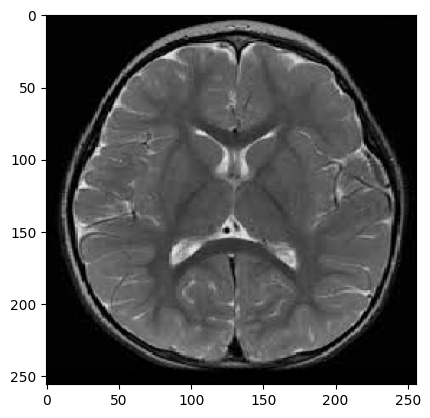

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_test[1])

In [ ]:
y_test[1]

0.0

In [ ]:
import numpy as np

In [ ]:
mode=CNN_tumor_detection()
np.argmax(model.predict(np.expand_dims(x_test[1],0)))

1/1 [==============================] - 0s 82ms/step


0